In [21]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

import math


### aim of this project is to:
### 1. check which are the variables are significant in predicting demand for vehicles in Indian market
### 2. how significant these variables are?



In [22]:
df = pd.read_csv("bike_sharing.csv")

In [23]:
df.shape

(10886, 12)

In [24]:
# there are ~10K datapoints and 12 columns

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
### data consits of how many bikes are rented at a given time.This is attributed by other features like: 
### season/ holidays/ temperature/ humidity/windspeed



In [27]:
### metric discussion: Given objective of project to do capacity/demand plannin and based on available dataset, 
### feature "count" seems to be important metric.
### It will given indication of number of bikes being used at a given period. Hence, we can check how this number 
###varies with other factors




In [28]:
# check the presence of null values in the data

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [29]:
### there are no null values in the data

In [30]:
### check presence if duplicate entries
len(df.drop_duplicates()) == df.shape[0]

True

In [31]:
### since length of data is same as length after dropping the duplicates, we can conclude that there are no 
### duplicate entries in the data

In [32]:
### check the datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [33]:
# check range and distribution of data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [34]:
### feature- "datetime" occurs as object data types, we have to convert it into datetime datatype.
### feature - "season","holiday", "workingday" and "weather" appear as categorical variable 
### feature - "temp", "atemp" , "humidity" , "windspeed", "casual", "registered", "count" appear as continuous 
### feature

In [35]:
### Now we have basic understanding of data, lets analyse the data with objective that:
### 1. we have to check factors responsible for number of bikes being booked
### 2. how strong these factors are

In [36]:
# This notebook is divided into 2 sections: Section 1: gives basic EDA to determine factors affecting number of 
# bookings. Section 2: Building hypothesis and testing these hypothesis


In [37]:
# Section 1: EDA - to determine factors affecting number of bookings

In [38]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [39]:
# 1a. for following analysis, we are treating ['season', 'holiday', 'workingday', 'weather'] as categorical 
#  variables and will see how variable "count" is related to them via boxplot

---------- season------------
   count   perc
4   2734  25.11
2   2733  25.11
3   2733  25.11
1   2686  24.67
min-> 1
max--> 977
	


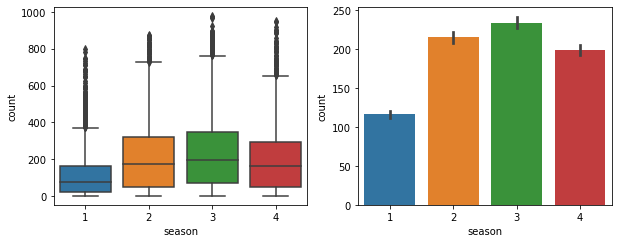

	
---------- holiday------------
   count   perc
0  10575  97.14
1    311   2.86
min-> 1
max--> 977
	


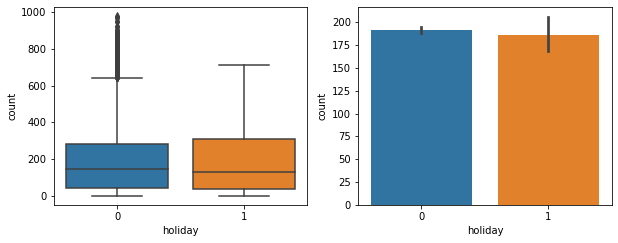

	
---------- workingday------------
   count   perc
1   7412  68.09
0   3474  31.91
min-> 1
max--> 977
	


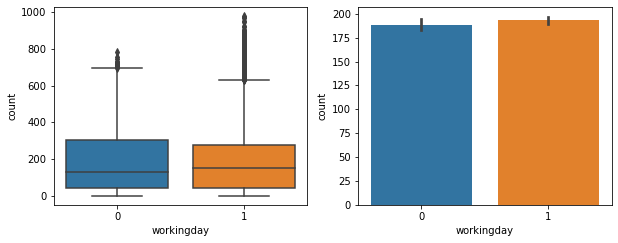

	
---------- weather------------
   count   perc
1   7192  66.07
2   2834  26.03
3    859   7.89
4      1   0.01
min-> 1
max--> 977
	


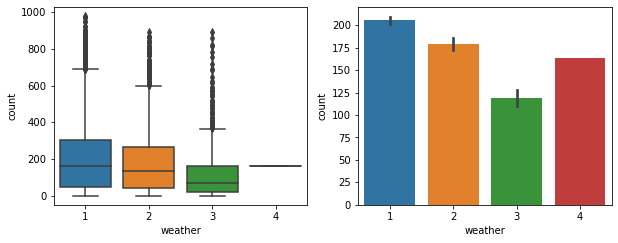

In [40]:
cols = ['season', 'holiday', 'workingday', 'weather']
n=2
for col in cols:
    count=1
    plt.subplots(figsize=(10, 8))
    print(f'---------- {col}------------')
    print(pd.DataFrame({'count': df[col].value_counts(), 'perc': ((df[col].value_counts()/len(df))*100).round(2)}))
    print('min->',min(df['count']))
    print('max-->',max(df['count']))
    
    print("\t")
    
    plt.subplot(n,2,count)
    sns.boxplot(x = col, y= df['count'],data = df)

    count+=1
    plt.subplot(n,2,count)
    sns.barplot(data = df, x = col, y= df['count'])
    
    plt.show()
    
    print("\t")


In [41]:
### conclusions:

### 1. feature "season": it has 4 almost equally distributed distinct values ((1: spring, 2: summer, 3: fall, 
# 4: winter)) ~ 25%. However, average of bike rentals in Season-3 (fall) is highest. Even the median value is highest. 
#     Though the median value in
# ###  season1(spring) is lowest and average value is also low(~114), but there seems to be many outliers (there are 
# around 1.5% times when bikes have been rented more than 350 times. This implies there are around 2% times that in 
# Season-1(spring),bikes have 
# ###  been booked much greater number of times than average/median value of that in season 3). We can test this in
# hypothesis testing.

# ### 2. feature "holiday": overall spread of data consists of ~97% when holiday = 0.  Average number of bikes rented 
# seems to be independent of Holiday (day is holiday or not). However, there are around 2.7% of times, bikes have been 
# rented more than 650 times when 
# ###    there is no holiday (Assuming 0 means "no-holiday"). We can test this in our hypothesis testing that whether 
# these outliers happened by chance or they actually represents the above conclusion(rentals are more in when 
# holiday=0)

# ### 3. feature "workingday": overall spread of data consists of ~68% when workingday =1. Average rental count and 
# median value seems independent of working day, but there are outliers (2.3% of data when workinfday=1) represent 
# higher than median values. 

# ### 4. feature "weather": overall spread of data suggest 66% of bookings made during weather =1 and 26% during 
#weather 
# =2. 
# (1 & 2 represents clear or lesser cloud weather). This makes sense as there are lesser rentals when weather is bad 
# (3/4 : rains/thunderstorm)
# ###   However, there are 2 interesting observations here : a. weather 3 has around 0.4% bookings more than 400 times 
# with average count of ~125. b. average count value when wether is bad(4) is ~160. This is just single entry 
# (index 5631). 
# ###   In this entry, season=1, no holiday and its workingday, with temperature ~10degC. There are 6 casual riders 
# and
# 158 registered rider. This looks like incorrect entry in weather column.



In [42]:
### few calculations for generating insights

print(len(df[(df['season'] == 1) & (df['count'] > 350)])/len(df))

print(len(df[(df['holiday'] == 0) & (df['count'] > 650)])/len(df))

print(len(df[(df['workingday'] == 1) & (df['count'] > 650)])/len(df))

print(len(df[(df['weather'] == 3) & (df['count'] > 400)])/len(df))

df[(df['weather'] == 4)]

0.014789638067242329
0.026915304060260884
0.022689693183905933
0.0036744442403086534


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [43]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [44]:
# 1b. for following analysis, we are treating ['temp','atemp', 'humidity', 'windspeed'] as continuous variables
# and will see how variable "count" is related to them via few scatter plots

In [45]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [46]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

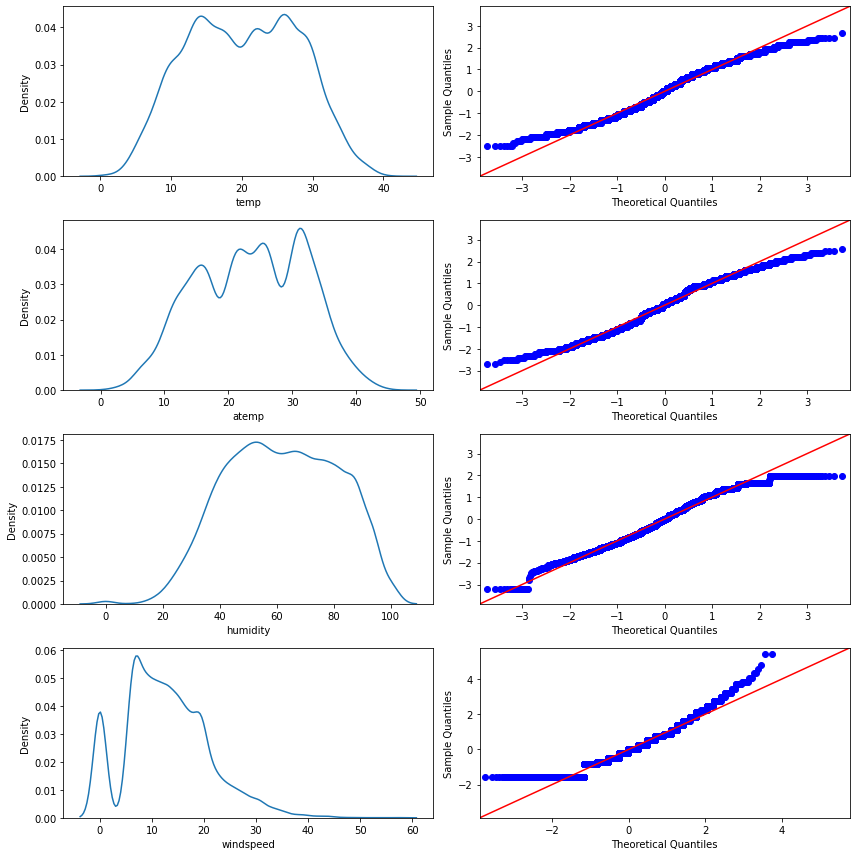

In [47]:
n= 0
f, axes = plt.subplots(4, 2, figsize=(12,12))

for col in cols:

    count=0
#     sns.displot(data= df, x= df[col], kind= "kde", ax=axes[n,count]) 
    sns.kdeplot(data= df, x= df[col], ax=axes[n,count]) 
    
    count+=1

    sm.qqplot(df[col], stats.norm, fit=True, line="45", ax=axes[n,count]) 

    count+=1
    n+=1

    plt.tight_layout()

In [48]:
### above plots just show how independent variables are distributed - their mean values , distribution can be seen

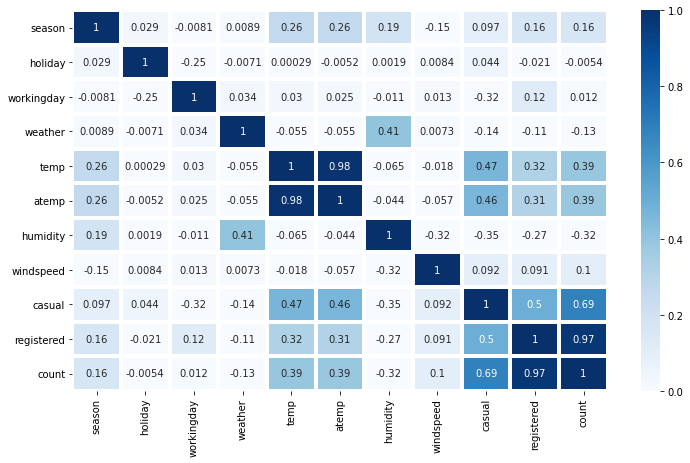

In [49]:
cormap = df.corr(method='pearson')
plt.figure(figsize=(12,7))
sns.heatmap(cormap,annot=True,linewidth =3,cmap='Blues', vmax=0,vmin=1)
plt.show()

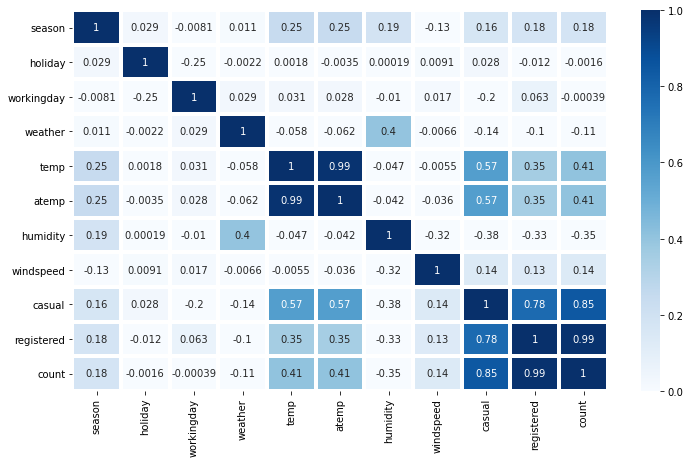

In [50]:
cormap = df.corr(method='spearman')
plt.figure(figsize=(12,7))
sns.heatmap(cormap,annot=True,linewidth =3,cmap='Blues',  vmax=0,vmin=1)
plt.show()

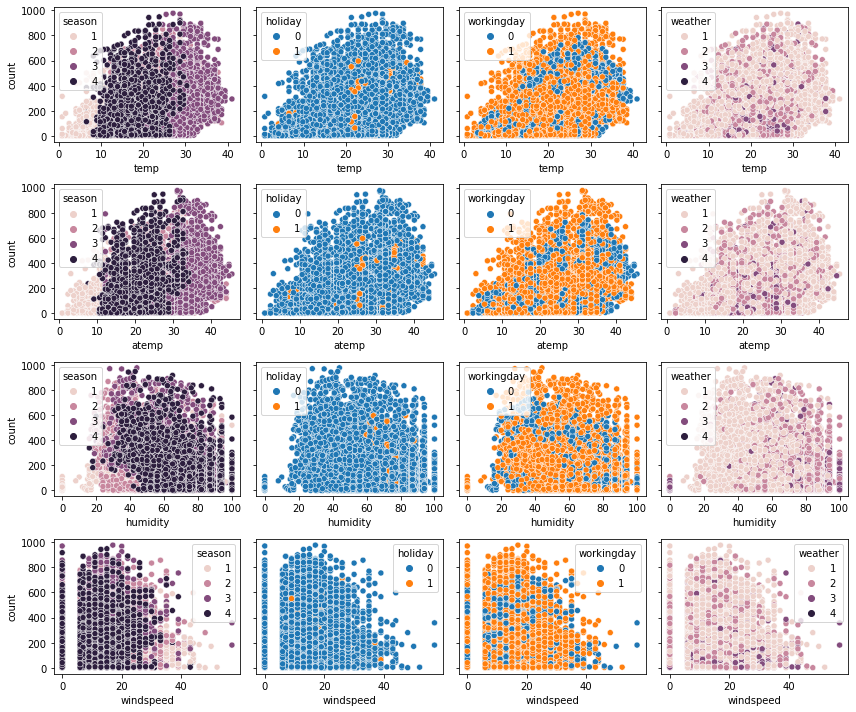

In [51]:

n= 0
f, axes = plt.subplots(4, 4, figsize=(12,10), sharey =True)

for col in cols:

    count=0
    sns.scatterplot(x = col, y= df['count'], data = df,hue = 'season', ax=axes[n,count]) 
    
    count+=1

    sns.scatterplot(x = col, y= df['count'], data = df,hue = 'holiday', ax=axes[n,count]) 

    count+=1

    sns.scatterplot(x = col, y= df['count'], data = df,hue = 'workingday', ax=axes[n,count]) 

    count+=1
    
    sns.scatterplot(x = col, y= df['count'], data = df,hue = 'weather', ax=axes[n,count]) 

    count+=1
    n+=1

    plt.tight_layout()

In [52]:
### no conclusions can be derived from above plots. We have to approximate the number of data points at a given 
# x-value. So, I have used relplot for the same as below

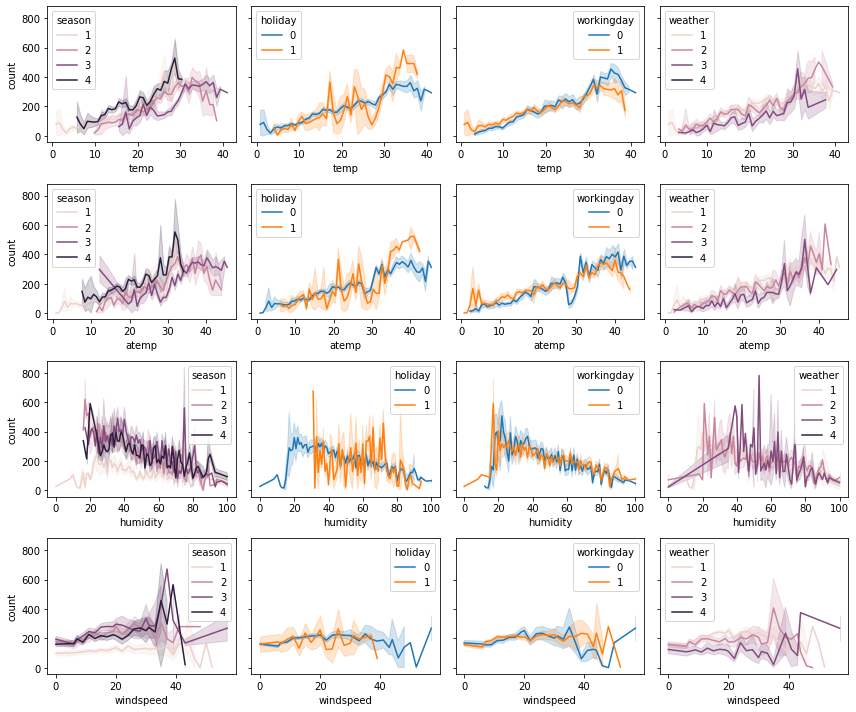

In [53]:

n= 0
f, axes = plt.subplots(4, 4, figsize=(12,10), sharey =True)

for col in cols:

    count=0
    sns.lineplot(x = col, y= df['count'], data = df,hue = 'season',ax=axes[n,count]) 
    
    count+=1

    sns.lineplot(x = col, y= df['count'], data = df,hue = 'holiday', ax=axes[n,count]) 

    count+=1

    sns.lineplot(x = col, y= df['count'], data = df,hue = 'workingday',ax=axes[n,count]) 

    count+=1
    
    sns.lineplot(x = col, y= df['count'], data = df,hue = 'weather', ax=axes[n,count]) 

    count+=1
    n+=1

    plt.tight_layout()

In [54]:
### conclusions 
###  from Pearson correlation plot and Spearman rank correlation plots (showing strength of association 
### between variables):

### good correlation is observed for the following
### 1. count - season,weather,temp,atemp, humidity : show good correlation with target variable "count". 
### Also, confirmed by monotonic values in spearman rank correlation plots
### 2. among independent variables, there is good correlation between following:
###.   season-windspeed (-ve), season-humidity (+ve), season-temp/atem (+ve)
###    holiday-workingday (-ve)
###    weather-humidity (+ve)
###.   windspeed -humidity (-ve)

### note that +ve corrletion means, as one increases other also increases and -ve means as one increases, 
### other decreases

### same observation can be seen from relplots above. 

In [55]:
# analysis of count/registered/casual data

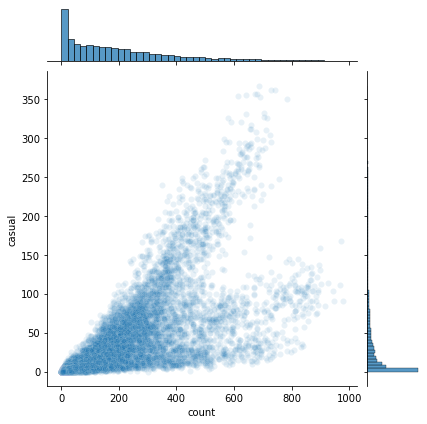

In [56]:
sns.jointplot(x = 'count', y = 'casual',data = df, alpha = 0.1)

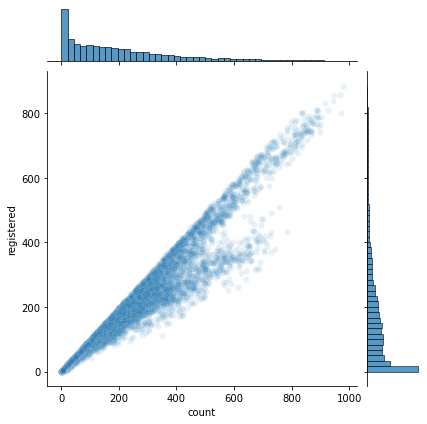

In [57]:
sns.jointplot(x = 'count', y = 'registered',data = df, alpha = 0.1)

In [58]:
### conclusions:
### as we can see that varibles almost follow linear relationship, we will use count variable only 
### for further analysis. ALso, the correlation coefficient of 'count' with "registered" and "casual" variables is 
### very high, we can just use one of them.



In [59]:
# analysis of "count" variable

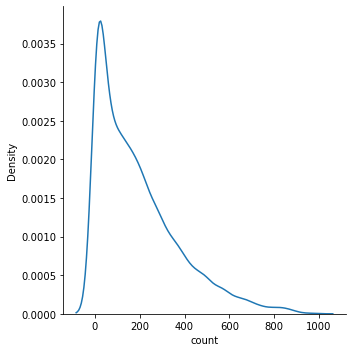

In [60]:
sns.displot(data= df, x= df['count'], kind= "kde")

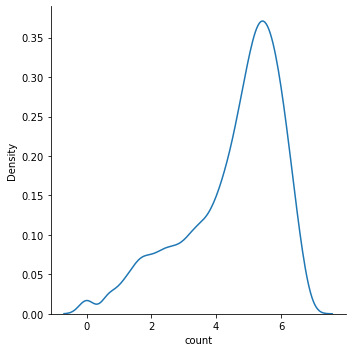

In [61]:
sns.displot(data= df, x= np.log(df['count']), kind= "kde")

lambda :0.3156702357923426


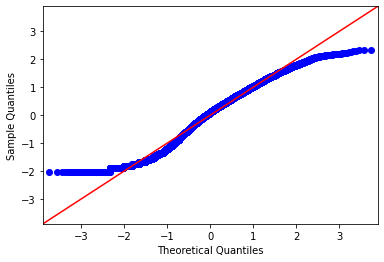

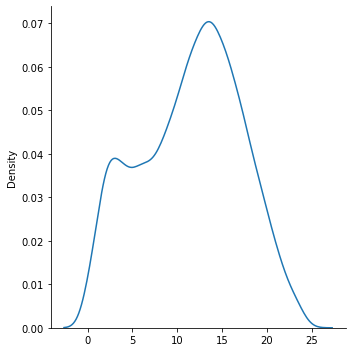

In [62]:
# applying box-cox transform method to get normal distribution

xt, l = stats.boxcox(df['count']); # returns x_trasnfomred and lambda
print("lambda :" + str(l))
# check if xt is gaussian or not using QQ-Plot
sm.qqplot(xt, stats.norm, fit=True, line="45")
sns.displot(data= df, x= xt, kind= "kde")

lambda :2.2096204647579096


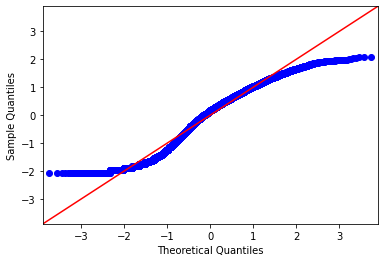

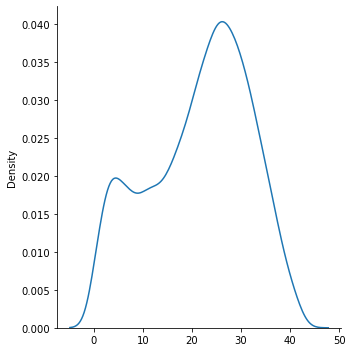

In [63]:
# another transform method to check if we get normal distribution 

xt, l = stats.yeojohnson(np.log(df['count'])); # returns x_trasnfomred and lambda
print("lambda :" + str(l))
# check if xt is gaussian or not using QQ-Plot
sm.qqplot(xt, stats.norm, fit=True, line="45")
sns.displot(data= df, x= xt, kind= "kde")

In [64]:
### conclusions:
### as we can see that the "count" distribution is not Gaussian even after trying various transformations techniques. 
### we will use the variable as it is without any transformations with assumption that CLT is valid as number of data 
### samples is very large

In [65]:
# few feature engineering on datetime variable


In [66]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [67]:
df['datetime_year']=df['datetime'].dt.year
df['datetime_month']=df['datetime'].dt.month
df['datetime_day']=df['datetime'].dt.day
df['datetime_week']=df['datetime'].dt.week
df['datetime_weekday']=df['datetime'].dt.weekday
df['datetime_hour']=df['datetime'].dt.hour

<ipython-input-67-e9f439df935b>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['datetime_week']=df['datetime'].dt.week


In [68]:
df.dtypes

datetime            datetime64[ns]
season                       int64
holiday                      int64
workingday                   int64
weather                      int64
temp                       float64
atemp                      float64
humidity                     int64
windspeed                  float64
casual                       int64
registered                   int64
count                        int64
datetime_year                int64
datetime_month               int64
datetime_day                 int64
datetime_week                int64
datetime_weekday             int64
datetime_hour                int64
dtype: object

In [69]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_week',
       'datetime_weekday', 'datetime_hour'],
      dtype='object')

In [70]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_week,datetime_weekday,datetime_hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,51,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,51,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,51,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,51,2,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,51,2,23


---------- datetime_year------------
      count   perc
2012   5464  50.19
2011   5422  49.81
min-> 1
max--> 977
	


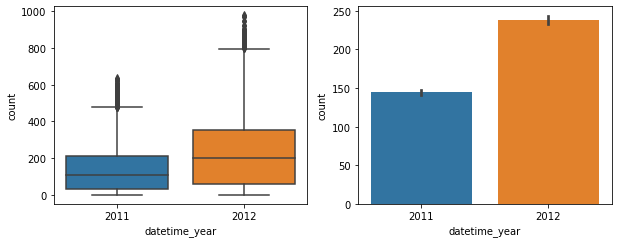

	
---------- datetime_month------------
    count  perc
8     912  8.38
12    912  8.38
5     912  8.38
6     912  8.38
7     912  8.38
10    911  8.37
11    911  8.37
9     909  8.35
4     909  8.35
2     901  8.28
3     901  8.28
1     884  8.12
min-> 1
max--> 977
	


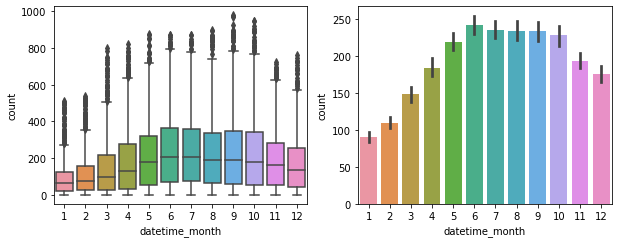

	
---------- datetime_day------------
    count  perc
1     575  5.28
9     575  5.28
17    575  5.28
5     575  5.28
8     574  5.27
19    574  5.27
7     574  5.27
14    574  5.27
13    574  5.27
4     574  5.27
15    574  5.27
16    574  5.27
12    573  5.26
3     573  5.26
2     573  5.26
6     572  5.25
10    572  5.25
11    568  5.22
18    563  5.17
min-> 1
max--> 977
	


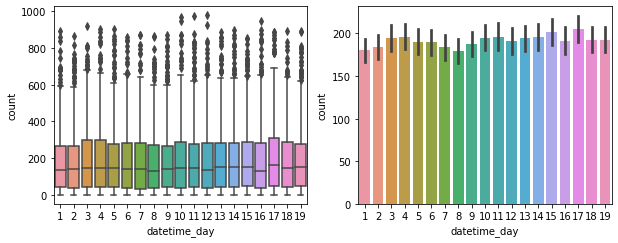

	
---------- datetime_week------------
    count  perc
32    336  3.09
40    336  3.09
28    336  3.09
24    336  3.09
23    336  3.09
27    336  3.09
41    336  3.09
49    336  3.09
19    336  3.09
50    336  3.09
14    335  3.08
37    335  3.08
45    335  3.08
36    334  3.07
15    334  3.07
10    330  3.03
2     330  3.03
6     330  3.03
1     329  3.02
18    312  2.87
46    312  2.87
7     310  2.85
11    308  2.83
33    288  2.65
31    288  2.65
5     261  2.40
20    240  2.20
44    240  2.20
9     239  2.20
22    192  1.76
42    191  1.75
3     154  1.41
29    144  1.32
35    144  1.32
48    144  1.32
16    144  1.32
38     96  0.88
51     96  0.88
13     96  0.88
26     96  0.88
52     71  0.65
25     48  0.44
39     48  0.44
12     24  0.22
17     24  0.22
47     24  0.22
min-> 1
max--> 977
	


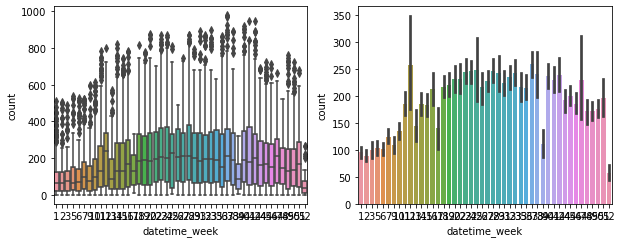

	
---------- datetime_weekday------------
   count   perc
5   1584  14.55
6   1579  14.50
3   1553  14.27
0   1551  14.25
2   1551  14.25
1   1539  14.14
4   1529  14.05
min-> 1
max--> 977
	


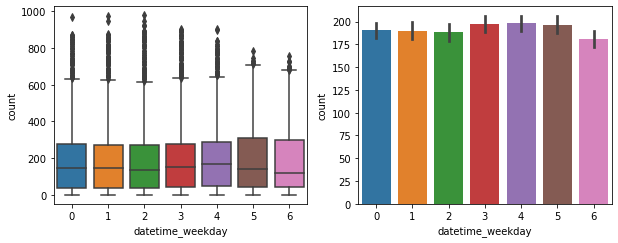

	
---------- datetime_hour------------
    count  perc
23    456  4.19
20    456  4.19
16    456  4.19
15    456  4.19
17    456  4.19
22    456  4.19
14    456  4.19
18    456  4.19
21    456  4.19
19    456  4.19
13    456  4.19
12    456  4.19
7     455  4.18
6     455  4.18
0     455  4.18
8     455  4.18
11    455  4.18
10    455  4.18
9     455  4.18
1     454  4.17
5     452  4.15
2     448  4.12
4     442  4.06
3     433  3.98
min-> 1
max--> 977
	


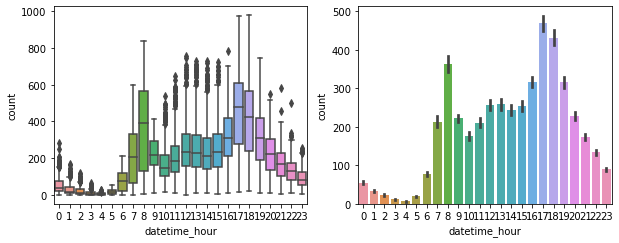

In [71]:
cols=['datetime_year', 'datetime_month', 'datetime_day', 'datetime_week','datetime_weekday', 'datetime_hour']

n=2
for col in cols:
    count=1
    plt.subplots(figsize=(10, 8))
    print(f'---------- {col}------------')
    print(pd.DataFrame({'count': df[col].value_counts(), 'perc': ((df[col].value_counts()/len(df))*100).round(2)}))
    print('min->',min(df['count']))
    print('max-->',max(df['count']))
    
    print("\t")
    
    plt.subplot(n,2,count)
    sns.boxplot(x = col, y= df['count'],data = df)

    count+=1
    plt.subplot(n,2,count)
    sns.barplot(data = df, x = col, y= df['count'])
    
    plt.show()
    
    print("\t")


In [90]:
df['datetime_yr_month_day'] = df['datetime'].apply(lambda x: str(x.year)+'_'  + str(x.month)+'_'+ str(x.day))
pd.DataFrame({'count': df['datetime_yr_month_day'].value_counts(), 'perc': ((df['datetime_yr_month_day'].
                                                                             value_counts()/len(df))*100).round(4)})



,count,perc
2012_3_13,24,0.2205
2012_10_5,24,0.2205
2012_12_3,24,0.2205
2012_2_9,24,0.2205
2012_4_18,24,0.2205
...,...,...
2011_1_3,22,0.2021
2011_2_11,22,0.2021
2011_1_11,22,0.2021
2011_1_12,22,0.2021


### conclusions:
### 1. date ranges from 1-19th for year 2011 and 2012. Median bookings in year 2012 is more than in year 2011. 
### 2. Month: rental bookings is highest in months June to October
### 3. Day - all 1-19 days are equally probable in terms of booking. No effect on median booking value
### 4. week of the year - same as from June-October showing higher bookings. Correlates with Month
### 4. weekday -  all the days in week are equally probable for bookings. No effect on median booking value
### 4. hour - Max bookings starts gradually from  7-8 AM, then stablises betweb 9am to 4pm and then peaks again 
### from 5-7 PM and then decreases.
### 5. datetime_yr_month_day -  combination of features year_month_day doesn't give much insihgts on bookings.All 
### values look equally probable

# Section 2: Hypothesis testing

In [75]:

### we will set level of significance (alpha) = 5% 
### alpha = 0.05


### Few hypothesis based on above EDA (with target variable as "count"):

### Season - good correlation
### workingday & holiday - there is better correlation between 'workingday' with number of bookings in comparison with 'holiday'. 
### As there is good correlation between 'workingday' and 'holiday', we can use any of one for further analysis
### weather & humidity & windspeed - good correlation with "count", but there is good correlation between weather and 
### humidity, 
### we can use either of them. As 'humidity' has got better correlation coefficient, we will use it for further 
### analysis. 
###                                  Same for 'windspeed'- we will drop 'windspeed' as it has got better correlation 
### with "humidity"


### temp or atemp - good correlation (we can take any of these as temp and atemp are closely related with 0.98 correlation coefficient)

### Also high values in spearman correlation coefficent denoting monotonicity is confirmed by corresponding higher values of pearson correlation coefficients

### Day - all 1-19 days are equally probable in terms of booking. No effect on median booking value
### Month - rental bookings is highest in months June to October
### weekday -  all the days in week are equally probable for bookings. No effect on median booking value
### hour - Max bookings starts gradually from  7-8 AM, then stablises betweb 9am to 4pm and then peaks again from 5-7 PM and then decreases.



### Based of above discussion, we can take following variables as driving factors for the rentals of these bikes:
### Season, Workingday, humidity, temp, Month, hour of booking time
### We can build our hypotheses around above variables and check if they are significant enough or high correlation is just due to chance.

In [91]:
### 1. Season
### Hypothesis : average count of bookings of rental bikes is same across all seasons
### Discussion : as 'season' is categorical variable and y-variable ('count') is continuous, 
### we will use Annova test here which will compute F-statistics as MSB/MSW and depending on test statistics, we can 
### compare p-value and alpha to make decisions.


### Null hypothesis, H0 = average count of bookings of rental bikes is independent of season
### Alternate hypothesis, Ha = average count of bookings of rental bikes depends of season in which booking is done

from scipy.stats import f_oneway

# data preparation for the test

dataSeason1 = df[df['season'] == 1]['count']
dataSeason2 = df[df['season'] == 2]['count']
dataSeason3 = df[df['season'] == 3]['count']
dataSeason4 = df[df['season'] == 4]['count']

# test statistics and p-value

ts ,p_value = f_oneway(dataSeason1, dataSeason2, dataSeason3, dataSeason4)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "season" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "season"')


p value is 6.164843386499654e-149
as p-value is very low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "season" in which booking is done


In [79]:
### 2. Workingday
### Hypothesis : average count of bookings of rental bikes is same across all both the workingday (0,1)

### Discussion : as 'workingday' is categorical variable with 2 unique values and y-variable ('count') is 
###continuous, we will use z-test (as number of samples in each category >30) here which will compute z statistics 
###and depending on test statistics, we can compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average count of bookings of rental bikes is independent of workingday
### Alternate hypothesis, Ha = average count of bookings of rental bikes depends of workingday in which booking is 
### done

from statsmodels.stats.weightstats import ztest as ztest


# test statistics and p-value

ts ,p_value= ztest(df[df['workingday'] == 0]['count'], df[df['workingday'] == 1]['count'])

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0  => conclusion: average count of bookings of rental bikes is depends of "workingday" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "workingday"')
    

p value is 0.22642176970306893
as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "workingday"


In [80]:
### 3. Month
### Hypothesis : average count of bookings of rental bikes is same across all months

### Discussion : as 'month' is categorical variable and y-variable ('count') is continuous, 
### we will use Annova test here which will compute F-statistics as MSB/MSW and depending on test statistics, we can compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average count of bookings of rental bikes is independent of month in which booking is done
### Alternate hypothesis, Ha = average count of bookings of rental bikes depends of month in which booking is done

from scipy.stats import f_oneway

# data preparation for the test

dataMonth1 = df[df['datetime_month'] == 1]['count']
dataMonth2 = df[df['datetime_month'] == 2]['count']
dataMonth3 = df[df['datetime_month'] == 3]['count']
dataMonth4 = df[df['datetime_month'] == 4]['count']

dataMonth5 = df[df['datetime_month'] == 5]['count']
dataMonth6 = df[df['datetime_month'] == 6]['count']
dataMonth7 = df[df['datetime_month'] == 7]['count']
dataMonth8 = df[df['datetime_month'] == 8]['count']

dataMonth9 = df[df['datetime_month'] == 9]['count']
dataMonth10 = df[df['datetime_month'] == 10]['count']
dataMonth11 = df[df['datetime_month'] == 11]['count']
dataMonth12 = df[df['datetime_month'] == 12]['count']


# test statistics and p-value

ts ,p_value= f_oneway(dataMonth1,dataMonth2,dataMonth3,dataMonth4,dataMonth5,dataMonth6,dataMonth7,dataMonth8,dataMonth9,dataMonth10,dataMonth11,dataMonth12)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "months" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "month"')
    

p value is 3.9670124592025475e-171
as p-value is very low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "months" in which booking is done


In [81]:
### 4. hour of booking
### Hypothesis : average count of bookings of rental bikes is same across entire day


### Discussion : as 'datetime_hour' is categorical variable and y-variable ('count') is continuous, we 
### will use Annova test here which will compute F-statistics as MSB/MSW and depending on test statistics, we can 
### compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average count of bookings of rental bikes is independent of hour of the day in which 
### booking is done
### Alternate hypothesis, Ha = average count of bookings of rental bikes depends of hour of the day in which booking 
### is done

from scipy.stats import f_oneway

# data preparation for the test
data_hr0 = df[df['datetime_hour'] == 0]['count']
data_hr1 = df[df['datetime_hour'] == 1]['count']
data_hr2 = df[df['datetime_hour'] == 2]['count']
data_hr3 = df[df['datetime_hour'] == 3]['count']
data_hr4 = df[df['datetime_hour'] == 4]['count']

data_hr5 = df[df['datetime_hour'] == 5]['count']
data_hr6 = df[df['datetime_hour'] == 6]['count']
data_hr7 = df[df['datetime_hour'] == 7]['count']
data_hr8 = df[df['datetime_hour'] == 8]['count']

data_hr9 = df[df['datetime_hour'] == 9]['count']
data_hr10 = df[df['datetime_hour'] == 10]['count']
data_hr11 = df[df['datetime_hour'] == 11]['count']
data_hr12 = df[df['datetime_hour'] == 12]['count']

data_hr13 = df[df['datetime_hour'] == 13]['count']
data_hr14 = df[df['datetime_hour'] == 14]['count']
data_hr15 = df[df['datetime_hour'] == 15]['count']
data_hr16 = df[df['datetime_hour'] == 16]['count']

data_hr17 = df[df['datetime_hour'] == 17]['count']
data_hr18 = df[df['datetime_hour'] == 18]['count']
data_hr19 = df[df['datetime_hour'] == 19]['count']
data_hr20 = df[df['datetime_hour'] == 20]['count']

data_hr21 = df[df['datetime_hour'] == 21]['count']
data_hr22 = df[df['datetime_hour'] == 22]['count']
data_hr23 = df[df['datetime_hour'] == 23]['count']


# test statistics and p-value

ts ,p_value= f_oneway(data_hr0,data_hr1,data_hr2,data_hr3,data_hr4,data_hr5,data_hr6,data_hr7,data_hr8,data_hr9,data_hr10,data_hr11,data_hr12,data_hr13,data_hr14,data_hr15,data_hr16,data_hr17,data_hr18,data_hr19,
                     data_hr20,data_hr21,data_hr22,data_hr23)

alpha = 0.05

print("p value is " + str(p_value))
print("test statistics is " + str(ts))

if p_value <= alpha:
    print('as p-value is very low ,we reject H0  => conclusion: average count of bookings of rental bikes is depends of "hours" of the day in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "hours" of the day')


p value is 0.0
test statistics is 504.7996962042245
as p-value is very low ,we reject H0  => conclusion: average count of bookings of rental bikes is depends of "hours" of the day in which booking is done


In [92]:
### lets check for weather as well

### 5.weather
### Hypothesis : average count of bookings of rental bikes is same across all weather
### Discussion : as 'weather' is categorical variable and y-variable ('count') is continuous, we will use Annova 
### test here which will compute F-statistics 
### as MSB/MSW and depending on test statistics, we can compare p-value and alpha to make decisions.

### Null hypothesis, H0 = average count of bookings of rental bikes is independent of weather
### Alternate hypothesis, Ha = average count of bookings of rental bikes depends of weather in which booking is done

from scipy.stats import f_oneway

# data preparation for the test

dataWeather1 = df[df['weather'] == 1]['count']
dataWeather2 = df[df['weather'] == 2]['count']
dataWeather3 = df[df['weather'] == 3]['count']
dataWeather4 = df[df['weather'] == 4]['count']

# test statistics and p-value

ts ,p_value = f_oneway(dataWeather1, dataWeather2, dataWeather3, dataWeather4)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "weather" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: average count of bookings of rental bikes independent of "weather"')


p value is 5.482069475935669e-42
as p-value is low ,we reject H0 => conclusion: average count of bookings of rental bikes is depends of "weather" in which booking is done


In [83]:
### 6. humidity
### Hypothesis : average count of bookings of rental bikes is increases as humidity decreases

### This hypothesis can be tested by association between "humidity" and "weather". As we saw weather has effect on bookings, we can check if "humidity" is independent of weather or not. 
### So, we will use chi-square test to check independence of these two variables


### Null hypothesis, H0 = variable humidity is independent of weather
### Alternate hypothesis, Ha = variable humidity depends of weather in which booking is done

from scipy.stats import chi2_contingency

#data preparation

data = np.array(df.groupby('weather', as_index=False)['humidity'].mean().values)

stat, p_value, dof, expected = chi2_contingency(data)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is low ,we reject H0 => conclusion: "humidity" depends of "weather" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: "humidity" is independent of "weather" in which booking is done')

    

p value is 0.8291865122594541
as p-value > alpha, we fail to reject H0 => conclusion: "humidity" is independent of "weather" in which booking is done


### Hence, this shows that our original hypothesis:average count of bookings of rental bikes is independent of humidity



In [85]:
### 7. temp
### Hypothesis : average count of bookings of rental bikes is increases as temperature increases

### This hypothesis can be tested by association between "temp" and "weather". As we saw weather has effect on bookings, 
### we can check if "temp" is independent of weather or not. 
### So, we will use chi-square test to check independence of these two variables


### Null hypothesis, H0 =  'temp' is independent of weather
### Alternate hypothesis, Ha =  'temp' depends of weather in which booking is done

from scipy.stats import chi2_contingency

#data preparation

data = np.array(df.groupby('weather', as_index=False)['temp'].mean().values)

stat, p_value, dof, expected = chi2_contingency(data)

alpha = 0.05

print("p value is " + str(p_value))

if p_value <= alpha:
    print('as p-value is low ,we reject H0 => conclusion: "temp" depends of "weather" in which booking is done')
else:
    print('as p-value > alpha, we fail to reject H0 => conclusion: "temp" is independent of "weather" in which booking is done')

    

p value is 0.11717960275986293
as p-value > alpha, we fail to reject H0 => conclusion: "temp" is independent of "weather" in which booking is done


### Hence, this shows that our original hypothesis:average count of bookings of rental bikes is independent of temp 

# conclusions and recommendations

### 1. These are features acting as driving factors for the rentals of these bikes:
### Season, Workingday, humidity, temp, Month, hour of booking time

### 2. from the hypothesis testing, we concluded that:
### a. average count of bookings of rental bikes is depends of "season" in which booking is done
### b.  average count of bookings of rental bikes independent of "workingday"
### c. average count of bookings of rental bikes is depends of "months" in which booking is done
### d. average count of bookings of rental bikes is depends of "hours" of the day in which booking is done
### e. average count of bookings of rental bikes is depends of "weather" in which booking is done
### f. other variables like humidity and temperature seems to be independent of weather. May be because we see these bikes mostly in Bangalore where, these factors actually seem to be independent.

